In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('age_salary.csv')

In [3]:
data

,index,Nation,purchased_item,salary,age
0,0,India,No,66777.0,23.0
1,1,Russia,Yes,87878.0,24.0
2,2,Germany,No,34559.0,NaN
3,3,India,Yes,40000.0,26.0
4,4,Germany,Yes,NaN,21.0
5,5,Russia,No,45000.0,NaN
6,6,Germany,Yes,89993.0,62.0
7,7,India,No,55555.0,24.0
8,8,Russia,Yes,NaN,45.0
9,9,Germany,Yes,67222.0,53.0


In [4]:
data.isnull().sum()

index             0
Nation            0
purchased_item    0
salary            2
age               2
dtype: int64

In [7]:
data['salary'].fillna(data.salary.mode()[0], inplace=True)

In [8]:
data['age'].fillna(data.age.mode()[0], inplace=True)

In [9]:
data.isnull().sum()

index             0
Nation            0
purchased_item    0
salary            0
age               0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['Nation','purchased_item']
for val in list:
    data[val]=le.fit_transform(data[val].astype(str))

In [11]:
data

,index,Nation,purchased_item,salary,age
0,0,1,0,66777.0,23.0
1,1,2,1,87878.0,24.0
2,2,0,0,34559.0,24.0
3,3,1,1,40000.0,26.0
4,4,0,1,34559.0,21.0
5,5,2,0,45000.0,24.0
6,6,0,1,89993.0,62.0
7,7,1,0,55555.0,24.0
8,8,2,1,34559.0,45.0
9,9,0,1,67222.0,53.0


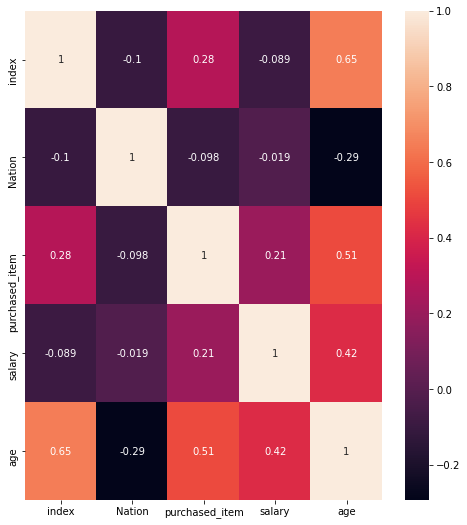

In [12]:
# correlation heatmap
import seaborn as sns
corr_hmap=data.corr()
plt.figure(figsize=(8,9))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [13]:
#removing outliers
from scipy.stats import zscore

In [14]:
z=np.abs(zscore(data))
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [15]:
data_new=data[(z<3).all(axis=1)] 

In [16]:
print(data.shape)
print(data_new.shape)

(10, 5)
(10, 5)


In [17]:
data=data_new
data.shape

(10, 5)

In [18]:
data.skew()

index             0.000000
Nation            0.223451
purchased_item   -0.484123
salary            0.616073
age               1.279672
dtype: float64

In [19]:
# treating skewness using log

for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [19]:
data.skew()

index             0.000000
Nation            0.223451
purchased_item   -0.484123
salary            0.281893
age               1.106303
dtype: float64

In [22]:
data1=data.drop(columns=['purchased_item','index','Nation'])
x=data1
y=data['purchased_item']

In [25]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 0.69006551, -0.71230961],
       [ 1.45178465, -0.60135315],
       [-1.13713805, -0.60135315],
       [-0.73155081, -0.39216872],
       [-1.13713805, -0.94881141],
       [-0.40482224, -0.60135315],
       [ 1.51775752,  1.91083434],
       [ 0.17968941, -0.60135315],
       [-1.13713805,  1.05602384],
       [ 0.70849012,  1.49184415]])

In [26]:
max_score=0

for r_state in range(37,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    print("Accuracy Score: ",score,"at random state: ",r_state)
    if score>max_score:
        max_score=score
        final_r_state=r_state
print("Maximimum Accuracy Score is",max_score,'at',final_r_state)

Accuracy Score:  0.3333333333333333 at random state:  37
Accuracy Score:  0.3333333333333333 at random state:  38
Accuracy Score:  0.0 at random state:  39
Accuracy Score:  0.0 at random state:  40
Accuracy Score:  0.3333333333333333 at random state:  41
Accuracy Score:  0.6666666666666666 at random state:  42
Accuracy Score:  0.6666666666666666 at random state:  43
Accuracy Score:  0.3333333333333333 at random state:  44
Accuracy Score:  0.3333333333333333 at random state:  45
Accuracy Score:  0.3333333333333333 at random state:  46
Accuracy Score:  0.3333333333333333 at random state:  47
Accuracy Score:  0.0 at random state:  48
Accuracy Score:  0.3333333333333333 at random state:  49
Accuracy Score:  0.6666666666666666 at random state:  50
Accuracy Score:  0.3333333333333333 at random state:  51
Accuracy Score:  0.6666666666666666 at random state:  52
Accuracy Score:  0.3333333333333333 at random state:  53
Accuracy Score:  0.6666666666666666 at random state:  54
Accuracy Score:  0.

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=63,test_size=0.22)

In [28]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,pred))
print('\n')
print('Confusion Matrix',confusion_matrix(y_test,pred))
print('\n')
print('classification report',classification_report(y_test,pred))


Accuracy Score:  1.0


Confusion Matrix [[1 0]
 [0 2]]


classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [29]:
#cross validation

from sklearn.model_selection import cross_val_score

scores=cross_val_score(lg,x,y,cv=5)
print(scores)
print(scores.mean(),scores.std())

[0.5 0.5 0.5 0.5 1. ]
0.6 0.2


In [31]:
# saving the model

import joblib
joblib.dump(lg,'salary.pkl') 

['salary.pkl']